(64800, 4)


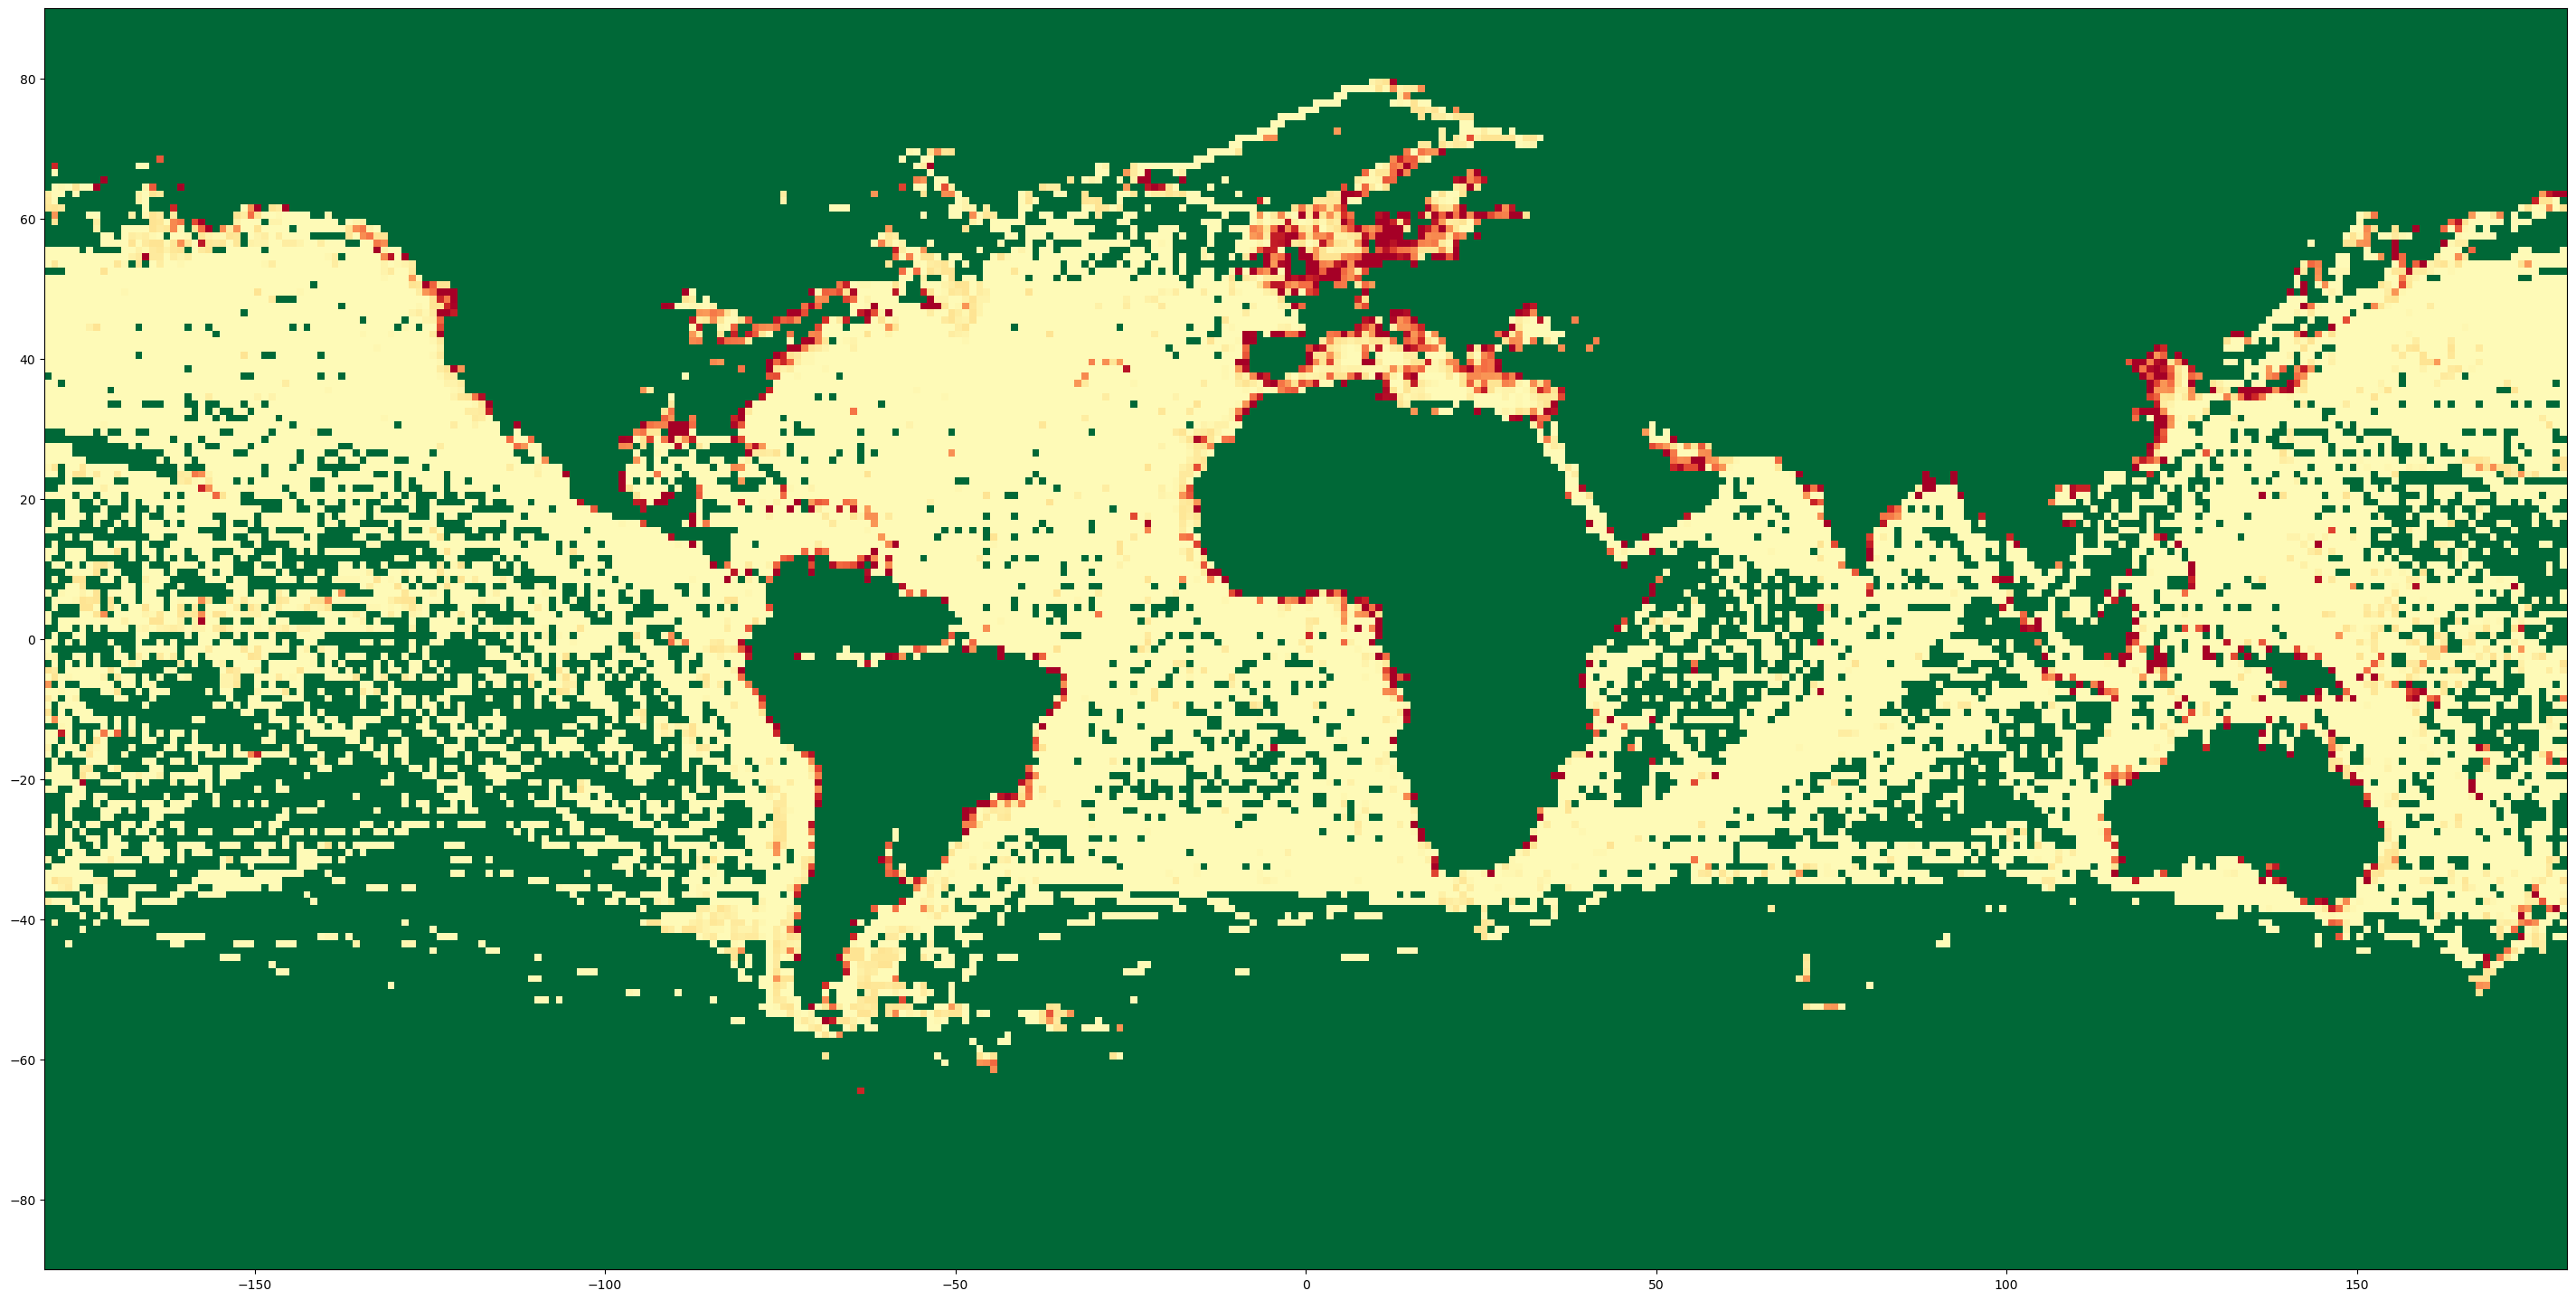

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import scipy.cluster.vq as scv
from mpl_toolkits.basemap import Basemap


def colormap2arr(arr,cmap):    
    # http://stackoverflow.com/questions/3720840/how-to-reverse-color-map-image-to-scalar-values/3722674#3722674
    gradient=cmap(np.linspace(0.0,1.0,100))

    # Reshape arr to something like (240*240, 4), all the 4-tuples in a long list...
    arr2=arr.reshape((arr.shape[0]*arr.shape[1],arr.shape[2]))
    print(arr2.shape)

    # Use vector quantization to shift the values in arr2 to the nearest point in
    # the code book (gradient).
    code,dist=scv.vq(arr2,gradient)

    # code is an array of length arr2 (240*240), holding the code book index for
    # each observation. (arr2 are the "observations".)
    # Scale the values so they are from 0 to 1.
    values=code.astype('float')/gradient.shape[0]

    # Reshape values back to (240,240)
    values=values.reshape(180, 360)
    values=values[::-1]
    return values
fig, ax = plt.subplots(figsize=(36,72))

arr=plt.imread('2011-06-01_1deg_density.png')
values=colormap2arr(arr,cm.jet)    
# Proof that it works:
plt.imshow(values, cmap='RdYlGn_r',
           origin='lower', extent=[-180,180,-90,90])


In [13]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
arr = arr.reshape(3, 4)
print(arr)
arr = arr[::-1]
print(arr)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 9 10 11 12]
 [ 5  6  7  8]
 [ 1  2  3  4]]


: 